In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../input/telecom-churn/telecom_churn.csv')
df.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

In [3]:
df.shape

(3333, 11)

In [4]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

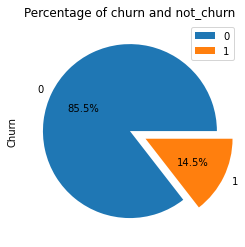

In [5]:
df.Churn.value_counts(normalize = True).plot(kind = 'pie', autopct = '%.1f%%', explode = [0, 0.2])
plt.title('Percentage of churn and not_churn')
plt.legend()
plt.show()

In [6]:
from pandas_profiling import ProfileReport
pf = ProfileReport(df, title = 'Telecom churn profile report')
pf.to_widgets()

In [7]:
#Define features and target
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split (X, y, test_size = 0.3, random_state = 0)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2333, 10), (1000, 10), (2333,), (1000,))

In [11]:
import keras

from keras.models import Sequential 
from keras.layers import Dense, Dropout


Using TensorFlow backend.


In [12]:
#Build ANN
model = Sequential()
model.add(Dense(64, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 10))
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation ='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 40, validation_data=(x_test, y_test))

Train on 2333 samples, validate on 1000 samples
Epoch 1/20
2333/2333 [==============================] - 1s 264us/step - loss: 0.5403 - accuracy: 0.7990 - val_loss: 0.3659 - val_accuracy: 0.8580
Epoch 2/20
2333/2333 [==============================] - 0s 64us/step - loss: 0.3938 - accuracy: 0.8547 - val_loss: 0.3195 - val_accuracy: 0.8720
Epoch 3/20
2333/2333 [==============================] - 0s 62us/step - loss: 0.3697 - accuracy: 0.8534 - val_loss: 0.2939 - val_accuracy: 0.8840
Epoch 4/20
2333/2333 [==============================] - 0s 64us/step - loss: 0.3358 - accuracy: 0.8684 - val_loss: 0.2804 - val_accuracy: 0.8860
Epoch 5/20
2333/2333 [==============================] - 0s 60us/step - loss: 0.3267 - accuracy: 0.8714 - val_loss: 0.2698 - val_accuracy: 0.9010
Epoch 6/20
2333/2333 [==============================] - 0s 63us/step - loss: 0.3273 - accuracy: 0.8731 - val_loss: 0.2599 - val_accuracy: 0.9050
Epoch 7/20
2333/2333 [==============================] - 0s 59us/step - loss: 0.31

In [15]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 28us/step


[0.2281155237555504, 0.9169999957084656]

In [16]:
y_pred = model.predict(x_test)

In [17]:
#To check...
y_test[:10]

405     0
118     0
710     0
499     0
2594    1
1977    1
1892    1
1463    0
565     0
2114    0
Name: Churn, dtype: int64

In [18]:
#To check...
y_pred[:10]

array([[0.38607833],
       [0.05302955],
       [0.10392559],
       [0.0156145 ],
       [0.9693219 ],
       [0.67405236],
       [0.3045129 ],
       [0.0120734 ],
       [0.07053974],
       [0.20770042]], dtype=float32)

In [19]:
history.history

{'val_loss': [0.36587739586830137,
  0.3194879388809204,
  0.29389864683151246,
  0.28038753688335416,
  0.2697601190209389,
  0.2598555713891983,
  0.2549965900182724,
  0.2488122296333313,
  0.2499365958571434,
  0.24229784369468688,
  0.24785688281059265,
  0.24080294191837312,
  0.23867372125387193,
  0.24083577752113342,
  0.23529227703809738,
  0.2364739841222763,
  0.23479448556900023,
  0.23458759129047393,
  0.2305258733034134,
  0.2281155216693878],
 'val_accuracy': [0.8579999804496765,
  0.871999979019165,
  0.8840000033378601,
  0.8859999775886536,
  0.9010000228881836,
  0.9049999713897705,
  0.906000018119812,
  0.9089999794960022,
  0.9110000133514404,
  0.9129999876022339,
  0.9110000133514404,
  0.9129999876022339,
  0.9120000004768372,
  0.9120000004768372,
  0.9129999876022339,
  0.9179999828338623,
  0.9150000214576721,
  0.9150000214576721,
  0.9210000038146973,
  0.9169999957084656],
 'loss': [0.5402864666517538,
  0.3937867108047443,
  0.3697073694926907,
  0.335

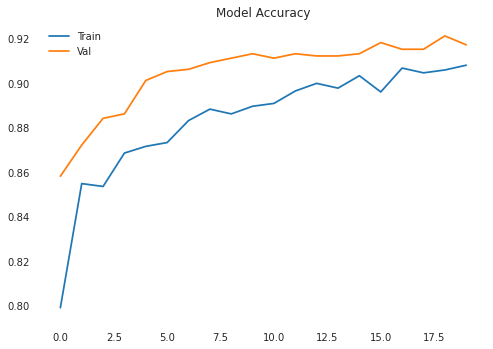

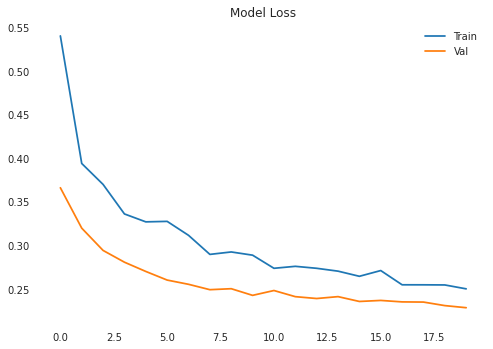

In [20]:
#Plot learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Val'])
plt.show()